# DS 3000 - Practicum 3

**Student Name**: Annabelle, Arav, Lily, Sam

**Date**: Nov 2024

Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.
Use markdown cells to explain your observations about the data.
Include the names of all teammates on all submissions
Ensure that your Python code is in a code cell and that it executes without errors.

# Question 1 — The DS Problem (0 point)

In your own words, formulate the Data Science problem.

Given the CDC's dataset on certain factors associated with diabetes, we must build a machine learning model that can classify individuals and their expected diabetes diagnostic status.  The factors that we get to work with include, diabetes status, whether they have high blood pressure, check their cholesterol, smoke, have had a stroke, have had heart disease or an attack, exercise, eat fruits and veggies, heavily consume alcohol, have healthcare, can afford healthcare, have difficulty walking, are male or female, as well as their general physical and mental health status, age group, education level, income level, and BMI.  

# Question 2 — Prepare the Data (5 pts)

- Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.

In [43]:
import pandas as pd

filename = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(filename)

# Preliminary checks
print(df.shape)
print(f'Data types: \n{df.dtypes}')

# Due to the large amount of data types, I have to break these up in order
# to get all of the data.
print(f'Data header: \n{df.iloc[:, : 20].head(10)}')
#  print(f'{df.loc[:, 'Education':'Income'].head(10)}')

# Null value checking
print(f'Missing values before cleaning:\n{df.isnull().sum()}')

(253680, 22)
Data types: 
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
Data header: 
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.

### Category Type Variables
The categorical types that we are dealing with (Diabetes_012, Age, GenHealth, Education, Income) are all ordinal, with a set position that matters in relation to the other values; they are "levels" with linear progressions.  For example, for Income, a category of 1 represents a salary of less than 10,000 dollars, 2 represents less than 35,000 dollars, et cetera. To a machine learning algorithm with no preexisting understanding for the significance of a specific salary, the only distinction between an actual dollar amount and a level representation is the degree of specificity.  This will be useful when we encode these categorical type variables as integers later in this problem. For the purposes of data cleaning, I will also consider MentHlth and PhysHlth categorical/ordinal types in this same way due to their relatively small domain (1 - 30).

### Binary Variables
There are many binary variables including HighBP, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, and Sex.  These may either be 1 or 0, and indicate a presence or lack of certain behaviors and conditions.  I decided to transform these into booleans.

### Continuous Integers
BMI cannot be 0, but does not technically have an upper limit.

For my data cleaning in the context of column type, I will check to make sure all values in a given column are consistent with the domain given by the data dictionary.

In [29]:
import numpy as np

# I made categorical_types a dictionary so that the associated domain may be checked
categorical_types = {'Diabetes_012': np.arange(3),
                     'GenHlth': np.arange(1,6),
                     'Age': np.arange(1,14),
                     'Education': np.arange(1,7),
                     'Income': np.arange(1,9),
                     'PhysHlth': np.arange(31),
                     'MentHlth': np.arange(31)}
categories = list(categorical_types.keys())


# Binary types should only be 0 or 1
binary_types = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
                "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                "DiffWalk", "Sex"]

# Check all of the "binary" columns to make sure they are either 1 or 0
for col in binary_types:
    real_domain = df[col].unique()
    real_domain.sort()
    if not(np.array_equal(real_domain, [0, 1])):
        print(f'Unexpected value in {col}: {df[col].unique().sort()}')
    df[col] = df[col].map({0: False, 1: True})

# Check all of the "categorical" type columns to make sure they are their expected domains
for col in categories:
    real_domain = df[col].unique().tolist()
    real_domain.sort()
    if not(real_domain == categorical_types[col].tolist()):
        print(f'Unexpected value in {col}: {real_domain}')
    df[col] = (df[col].astype('int64')).astype('category')

# Check that no one has a BMI of 0
if (df['BMI'].min() <= 0):
    print("Invalid BMI values detected")

# Convert BMI
df['BMI'] = df['BMI'].astype('int64')

# Print results
print(f'Data types: \n{df.dtypes}')
print(f'Data header: \n{df.iloc[:, : 20].head(10)}')
# print(f'{df.loc[:, 'Education' : 'Income'].head(10)}')

Data types: 
Diabetes_012            category
HighBP                      bool
HighChol                    bool
CholCheck                   bool
BMI                        int64
Smoker                      bool
Stroke                      bool
HeartDiseaseorAttack        bool
PhysActivity                bool
Fruits                      bool
Veggies                     bool
HvyAlcoholConsump           bool
AnyHealthcare               bool
NoDocbcCost                 bool
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                    bool
Sex                         bool
Age                     category
Education               category
Income                  category
dtype: object
Data header: 
  Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            0    True      True       True   40    True   False   
1            0   False     False      False   25    True   False   
2            0    True      T

# Question 3 — (20 points)

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

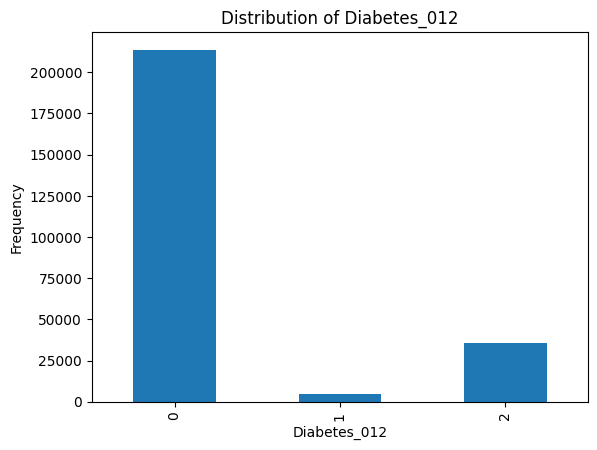

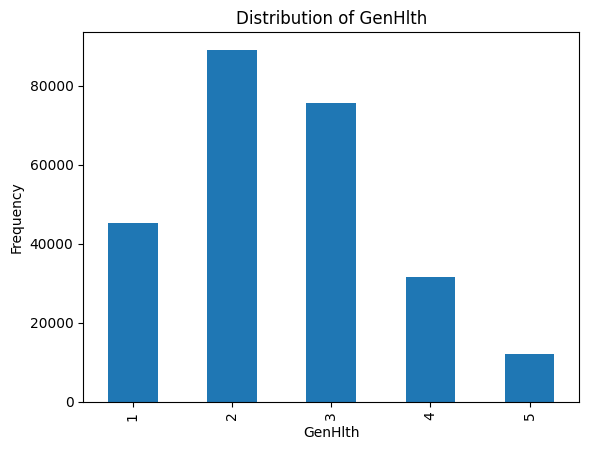

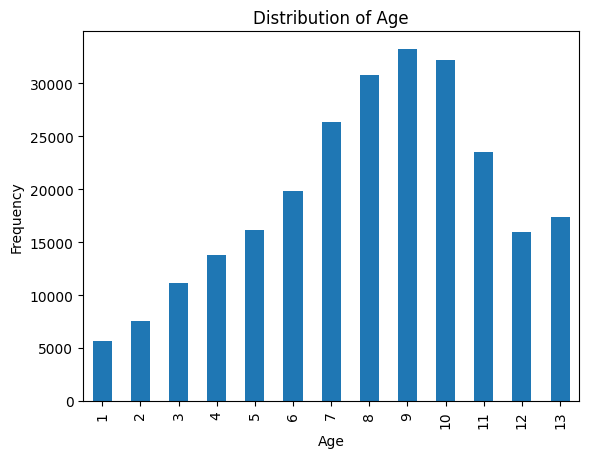

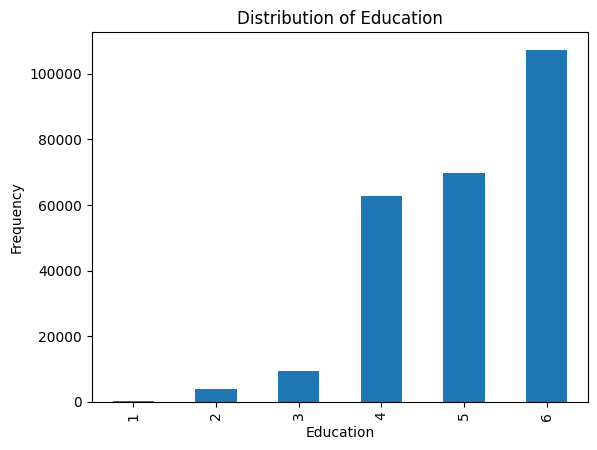

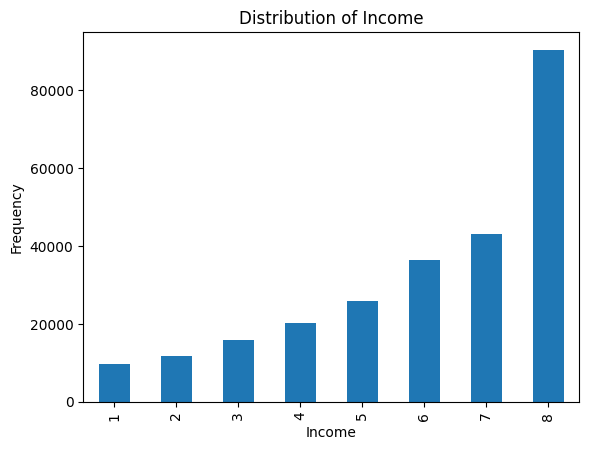

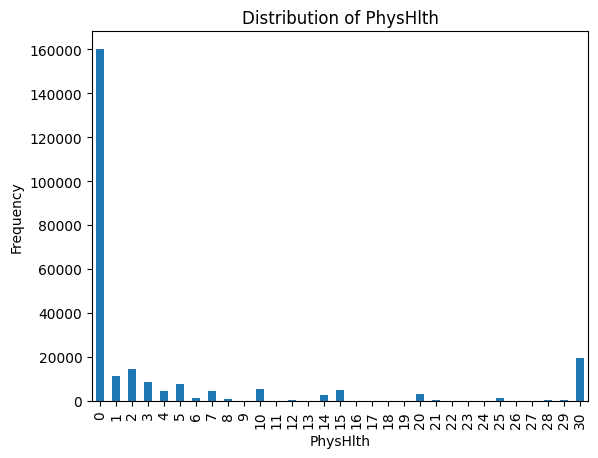

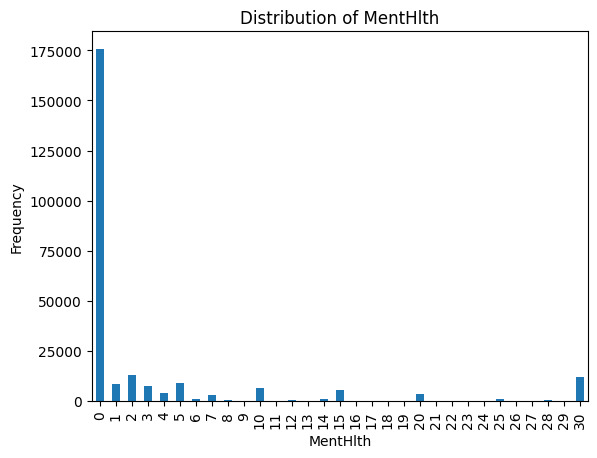

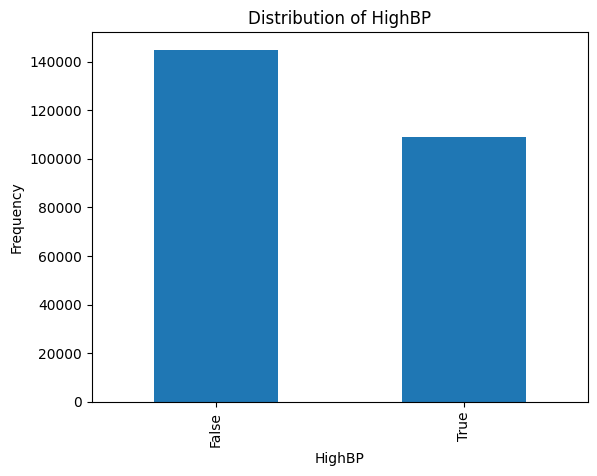

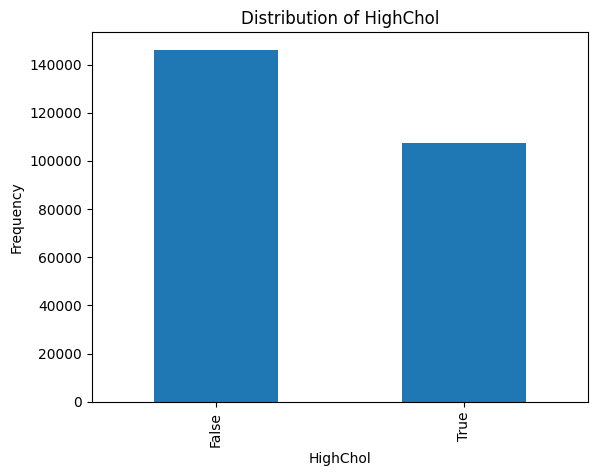

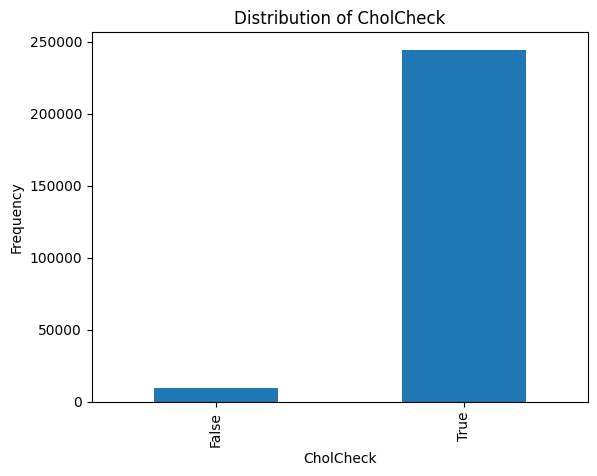

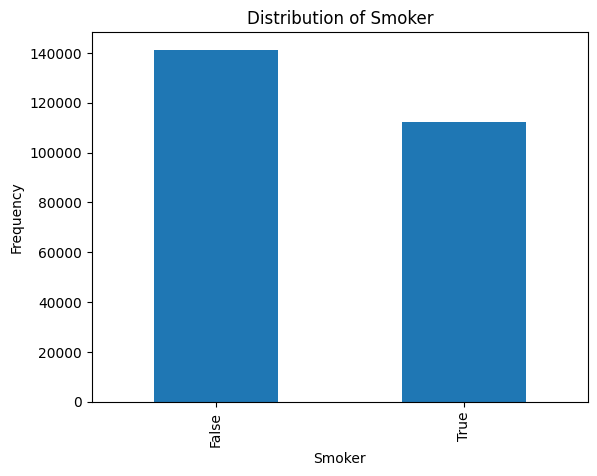

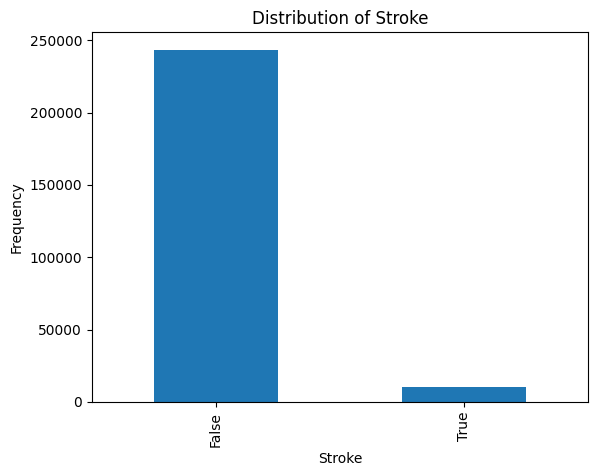

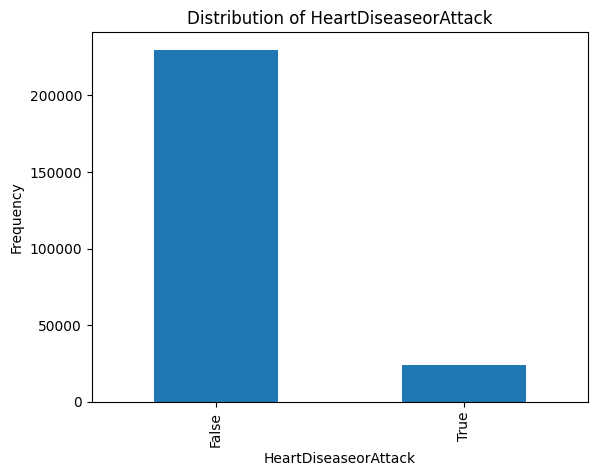

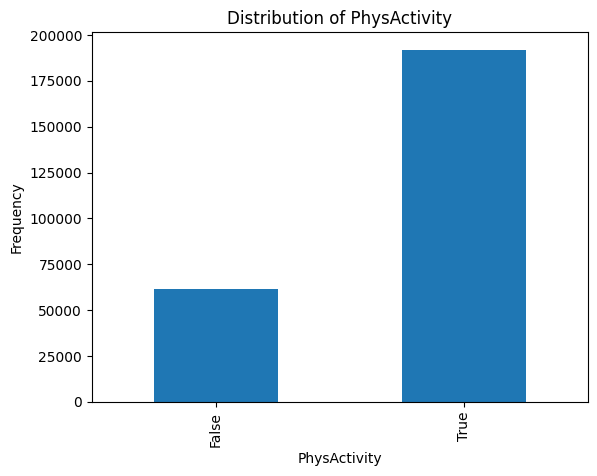

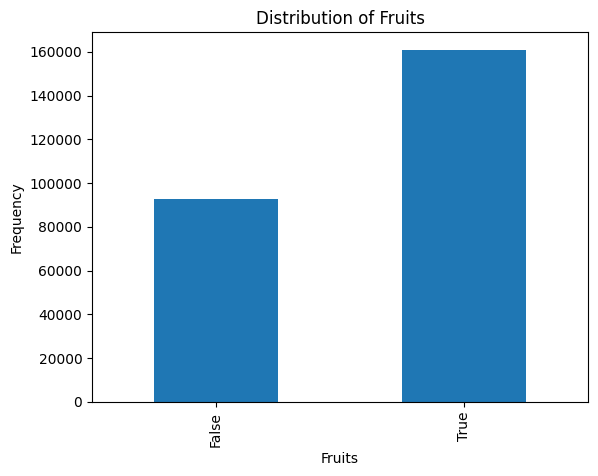

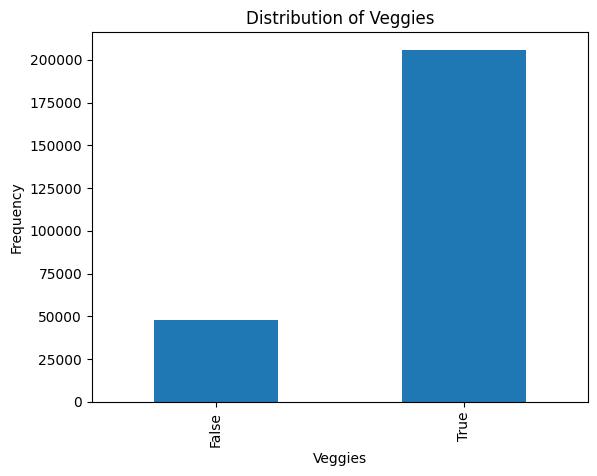

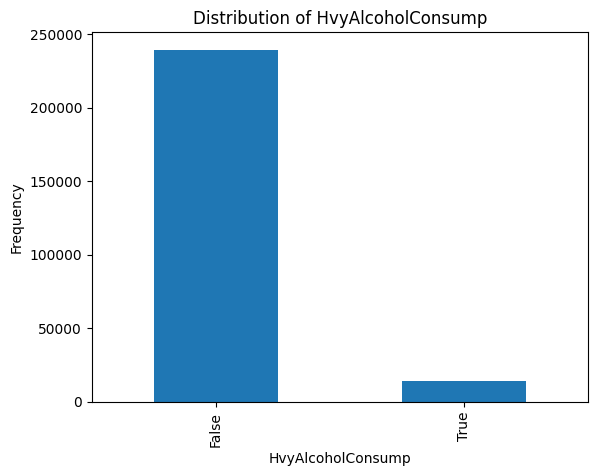

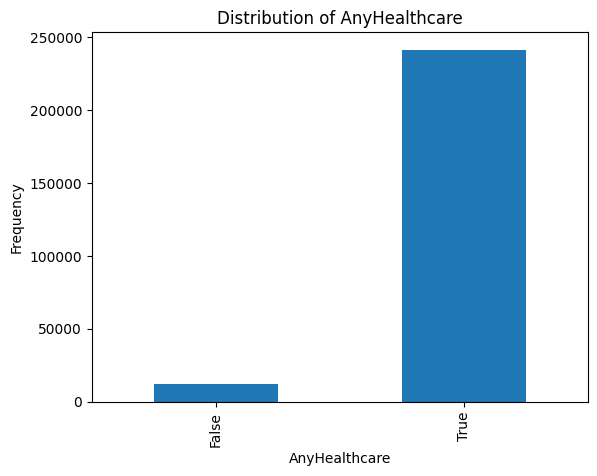

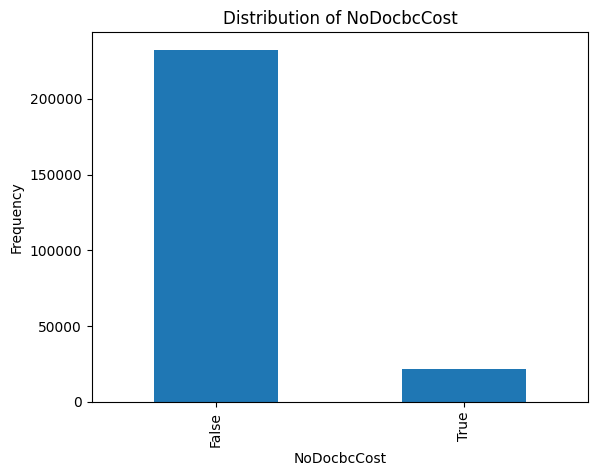

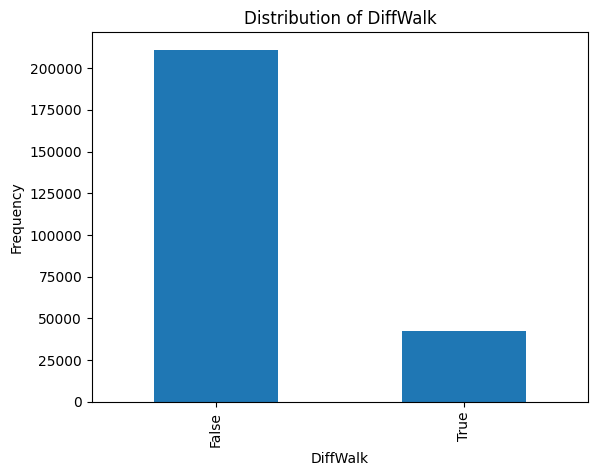

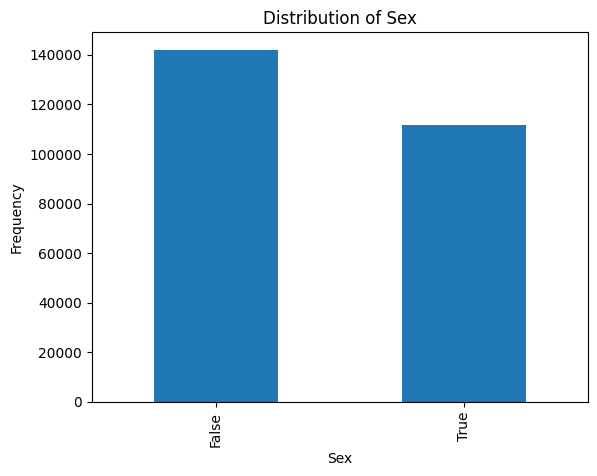

Text(0, 0.5, 'Frequency')

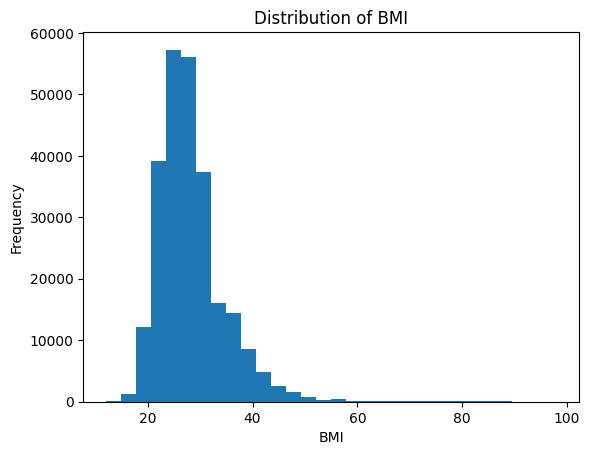

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# I decided not to use a pairplot, as the vast majority of the data is no longer numerical
# but categorical or boolean.  Thus, I will create histograms of each variable and plot their
# relative correlations.  If I had kept all of these as integers, we would face other issues, including
# that the variables are not continuous and thus do not have clear, easy to read distributions
bar_chart_vars = list(categorical_types.keys())
bar_chart_vars.extend(binary_types)
for col in bar_chart_vars:
    sorted_counts = df[col].value_counts().sort_index()
    sorted_counts.plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

bmi_data = df['BMI'].tolist()
plt.hist(bmi_data, bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")

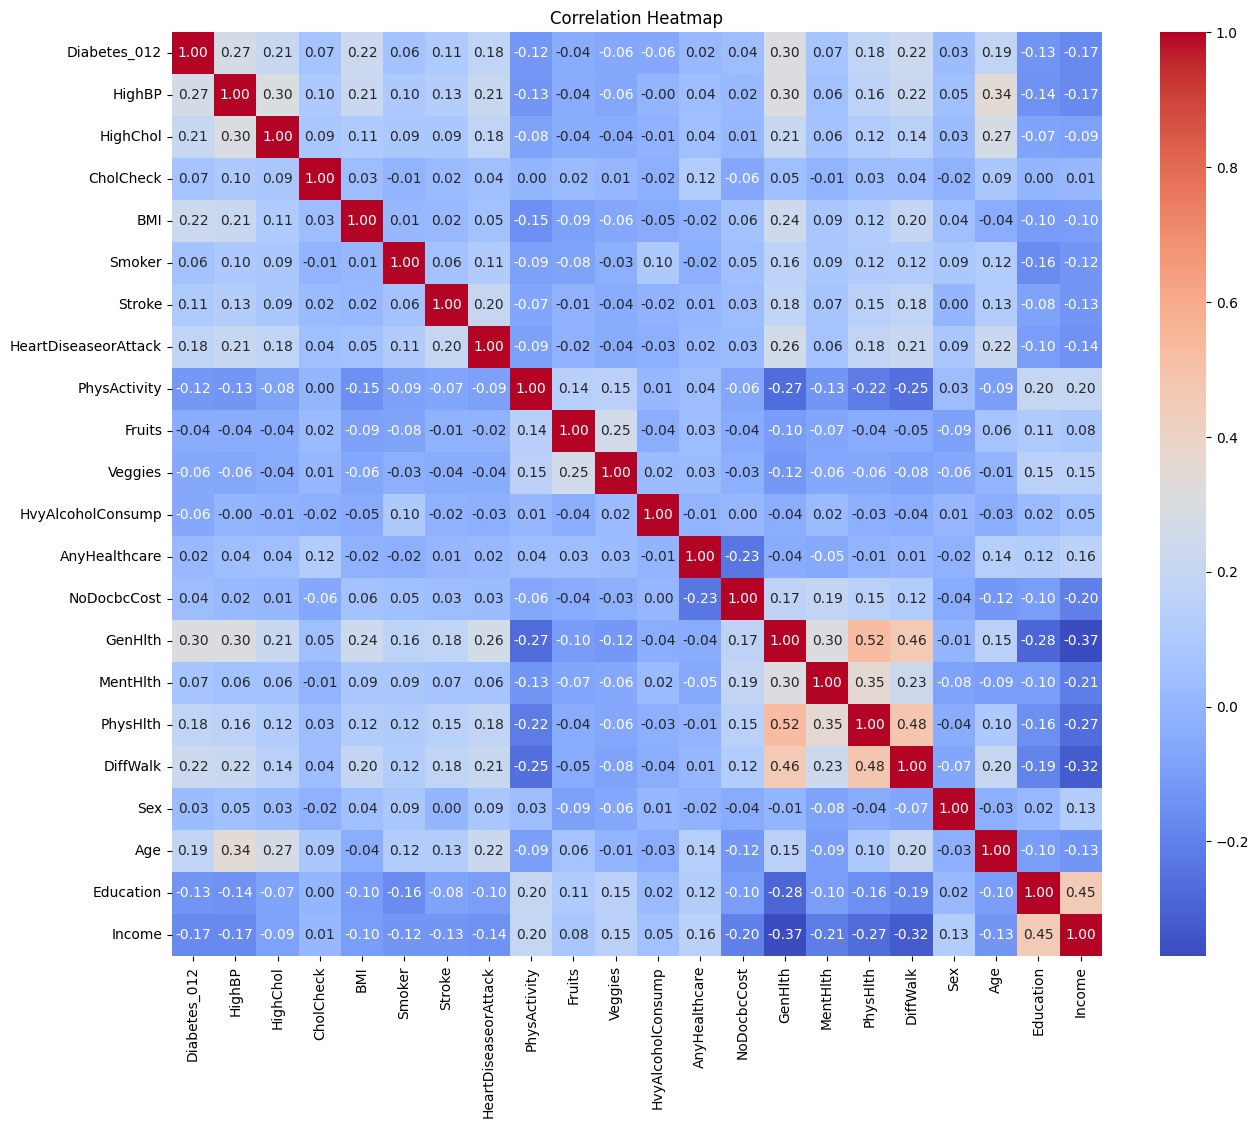

In [31]:
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Analysis

## Histograms

Here are descriptions of the overall distribution of each of the parameters in the dataset and the significance of each of these biases:

1.	Diabetes_012: The chart indicates that the majority of individuals in the dataset do not have diabetes, with a smaller proportion having type 2 diabetes and an even smaller proportion having type 1 diabetes.
2.	HighBP: The chart shows that more individuals in the dataset do not have high blood pressure compared to those who do. However, there is still a significant number of individuals with high blood pressure.
3.	HighCol: Similar to the high blood pressure chart, the majority of individuals do not report having high cholesterol, although a substantial minority does.
4.	CholCheck: The vast majority of individuals in this dataset have had their cholesterol checked within the past five years.
5.	NoDocBcCost: Most individuals in the dataset did not encounter difficulties obtaining medical care due to financial constraints.
6.	Smoker: The majority of individuals in the dataset are non-smokers, although a considerable minority are smokers.
7.	Stroke: A relatively small proportion of individuals in the dataset reported having experienced a stroke.
8.	HeartDiseaseOrAttack: A relatively small proportion of individuals in the dataset reported having heart disease or experiencing a heart attack.
9.	PhysActivity: The majority of individuals in the dataset report engaging in physical activity.
10.	Fruits: Most participants report consuming fruit at least once per day.
11.	Veggies: An even larger proportion of participants report daily vegetable consumption.
12.	HvyAlcoholConsump: A small proportion of individuals in the dataset report heavy alcohol consumption.
13.	AnyHealthcare: An overwhelming majority of participants have access to healthcare.
14.	GenHlth: The chart approximates a normal distribution with a slight right skew, peaking at a self-reported “Very Good” overall health rating. This suggests that most individuals consider their general health to be very good.
15.	PhysHlth: The chart indicates that the majority of individuals reported no days of poor physical health in the past 30 days. Some individuals reported a few days of poor health, while a notable minority experienced poor health every day.
16.	MentHlth: Similar to physical health, most individuals reported no days of poor mental health, with a smaller subset reporting a few days of poor mental health and a significant minority reporting poor mental health every day.
17.	Sex: The majority of individuals in the dataset are female.
18.	Age: The chart is slightly left-skewed, suggesting that the dataset is composed predominantly of older age groups. Representation declines sharply in the oldest age groups, suggesting middle-aged adults make up the largest segment of the dataset.
19.	Education: The chart is heavily left-skewed, indicating that the sample predominantly consists of well-educated individuals. The largest group has at least a bachelor’s degree (level 6), followed by individuals with some college education and high school degrees. Representation decreases significantly below these education levels.
20.	Income: Income distribution follows an upward exponential trend, with the largest group earning over $75,000 annually. Higher income levels are more prevalent in the dataset.
21.	DiffWalk: The majority of individuals in the dataset report no difficulty walking.
22.	BMI: The BMI distribution is approximately normal but slightly right-skewed, with a mean BMI between 25 and 30. The longer right tail indicates more extreme cases of obesity compared to undernutrition.

## Correlation matrix

Here, I described each of the correlations between variables in the dataset. I classified |R| values between 0.4 and 0.6 as "moderately correlated" and 0.3 and 0.4 as "Slightly correlated".  

### Moderate relationships are established in the data between:
1. General Health and Physical Health (r=0.52): A moderate positive correlation exists between general health and the number of days of poor physical health. This suggests that individuals who report worse general health are more likely to experience more days of poor physical health.
2. Physical Health and Difficulty Walking (r=0.48): There is a moderate positive correlation between poor physical health and difficulty walking. This implies that individuals experiencing more days of poor physical health are also more likely to report serious difficulties walking or climbing stairs.
3. General Health and Difficulty Walking (r=0.46): General health is moderately correlated with difficulty walking, indicating that individuals with worse overall health are more likely to report walking difficulties.
4. Education and Income (r=0.45): A moderate positive relationship between education level and income suggests that higher levels of education are generally associated with higher income levels.
   
### Slight relationships are established in the data between:
1.	General Health and Income (r=-0.37): A slight negative correlation exists between general health and income, suggesting that individuals with higher incomes tend to report better general health.
2.	Physical Health and Mental Health (r=0.35): Physical and mental health have a slight positive correlation, indicating that individuals experiencing poor physical health may also experience poor mental health.
3.	High Blood Pressure and Age (r=0.34): A slight positive correlation is observed between high blood pressure and age, suggesting that older individuals are more likely to have high blood pressure.
4.	Difficulty Walking and Income (r=-0.32): There is a slight negative correlation between difficulty walking and income, indicating that individuals with higher incomes are less likely to report difficulty walking.
5.	General Health and Diabetes_012 (r=0.30): General health shows a slight positive correlation with diabetes status, implying that individuals with diabetes or prediabetes are more likely to report worse overall health.
6.	General Health and High Blood Pressure (r=0.30): A slight positive relationship exists between general health and high blood pressure, indicating that individuals with high blood pressure tend to report poorer general health.
7.	Mental Health and General Health (r=0.30): General health and mental health show a slight positive correlation, suggesting that individuals with worse general health also report more days of poor mental health.
8.	High Cholesterol and High Blood Pressure (r=0.30): There is a slight positive correlation between high cholesterol and high blood pressure, indicating that individuals with high cholesterol are more likely to have high blood pressure.

# Question 4a — (20 points)

Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [32]:
# imports
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency


# pattern 1 - relationship between education and income

# performing chi2-test
sample_edu = df['Education']
sample_income = df['Income']
pair = [sample_income, sample_edu]

alpha = 0.05
stat, p_value, dof, expected = chi2_contingency(pair)
print('The p value is', p_value)

if (p_value <= alpha):
  print('Education and Income are dependent.')
else:
  print('Education and Income are independent.')

# pattern 2 - relationship between general health and physical health

# performing chi2-test
sample_gen = df['GenHlth']
sample_walk = df['DiffWalk']
sample_physical = df['PhysHlth']
pair2 = [sample_gen, sample_physical]

stat, p_value, dof, expected = chi2_contingency(pair2)
print('The p value is', p_value)
if (p_value <= alpha):
  print('general health and walking difficulty are dependent.')
else:
  print('general health and walking difficulty are independent.')


# pattern 3 - relationship between income and physical health

# performing chi2-test
sample_physical = df['PhysHlth']
pair3 = [sample_gen, sample_income]

stat, p_value, dof, expected = chi2_contingency(pair3)
print('The p value is', p_value)
if (p_value <= alpha):
  print('physical health and income are dependent.')
else:
  print('physical health and income are not independent.')



The p value is 1.0
Education and Income are independent.
The p value is 0.0
general health and walking difficulty are dependent.
The p value is 1.0
physical health and income are not independent.


## Explanation and Feature Picking

So, keep in mind that we tested the statistical significance for education and income, general health and walking difficulty, income and education. Chi-squared tests were used since a majority of the data was categorical.

We found that general health and walking difficulty are statistically significant.

Also, from the previously mapped out correlation, we can see that for diabetes, the features with the MOST POSITIVE correlations were general health and high blood pressure. Then, the features with the MOST NEGATIVE correlations were income, education and physical health.

**So from this information, we can deduce that the best features for our model that can help us predict diabetes are general health, high blood pressure, income, education and physical health.**



# [Optional] Question 4b — (10 points)

This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following
(1) Feature engineering: Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.
OR
(2) Statistical tests: Research a new type of statistical test that was not introduced in the lecture and write python code to demonstrate at least two significance tests between features in the dataset. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

In [33]:
# imports
from statsmodels.stats.contingency_tables import mcnemar

# performing the mcnemar tests

# test 1 - heart disease or attack and general health

data = [df['HeartDiseaseorAttack'], df['GenHlth']]

print(mcnemar(data, exact=False))

# test 2 - high blood pressure and age

data = [df['HighBP'], df['Age']]
print(mcnemar(data, exact=False))


pvalue      0.07363827012030258
statistic   3.2
pvalue      0.007660761135179461
statistic   7.111111111111111


## Explanation

I used the Mcnemar test which helps us see proportions in nominal data, which is fitting here since almost all of the categories here are nominal (categorical with no specific ordering)

In terms of results, we see that our p value for heart disease/attack and general health is 0.07 which is greater than 0.05 (typical alpha value) and so we can deem it's not statistically significant. On the other hand, high blood pressure and age have a p value of 0.007 meaning they ARE statistically significant, and also because of the nature of the mcnemar test, it means that these two values affect each other's proportions.

## Will we use it?

We are already using the features general health and high blood pressure. I think that due to the results of the Mcnemar test including age would also be a good idea for our model since it shows that age changes the proportion of high blood pressure in people.

In [34]:
df = df.head(100)
df.shape

(100, 22)

# Question 5 — (5 points)

Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

# Set up all preprocessors
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()

# Filter df by significant columns
X = df[['GenHlth', 'HighBP', 'Age', 'Income', 'Education', 'PhysHlth']]
y = df['Diabetes_012']

# Partition train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Y TEST AND TRAIN
# Encode diabetes_012 doesnt need any other preprocessing because it is target
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Create lists of variable types for processing
categorical = ['Income', 'Education']
numerical = ['Age', 'PhysHlth', 'GenHlth']
bools = ['HighBP']

# TRAIN DATA
# Ordinal encode categorical features and make into dataframe
# Used instead of onehot to have less columns - allowing ML models to run faster
cat_features = ordinal_encoder.fit_transform(X_train[categorical])
cat_df = pd.DataFrame(cat_features, columns=categorical)

# Standardize numerical features and convert to df
num_features = scaler.fit_transform(X_train[numerical])
num_df = pd.DataFrame(num_features, columns=numerical)

# No preprocessing needed for bool so make it its own df to concat
# Reset index so booleans index isnt messed up
bool_df = X_train[bools].reset_index()

# Concat preprocessed features into one df
X_train_processed = pd.concat([cat_df, num_df, bool_df], axis=1, ignore_index=True)


# TEST DATA
# Transform Test Set using same encoders from train set
# but transform instead of fit_transform
X_test_cat_features = ordinal_encoder.transform(X_test[categorical])
X_test_cat_df = pd.DataFrame(X_test_cat_features, columns=categorical)

X_test_num_features = scaler.transform(X_test[numerical])
X_test_num_df = pd.DataFrame(X_test_num_features, columns=numerical)

X_test_bool_df = X_test[bools].reset_index()

# Combine the test set features
X_test_processed = pd.concat([X_test_cat_df, X_test_num_df, X_test_bool_df], axis=1)


# Question 6 — (30 points)

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
Use GridSearchCV to tune at least two hyperparameters for each algorithm.
Note: do not change the input features in your experiments.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=20, class_weight='balanced')

# Hyperparameter Grid
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}

# Apply GridSearchCV
rf_gridsearch = GridSearchCV(estimator=rf, param_grid=rf_params, cv=3, scoring='accuracy')
rf_gridsearch.fit(X_train_processed, y_train)

# Get best model and evaluate
rf_bestmodel = rf_gridsearch.best_estimator_
rf_ypred = rf_bestmodel.predict(X_test_processed)

# Print results
print("Random Forest Classifier:")
print("Best Hyperparameters:", rf_gridsearch.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_ypred))
print("Classification Report:\n", classification_report(y_test, rf_ypred))
print()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Random Forest Classifier:
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           2       0.00      0.00      0.00         5

    accuracy                           0.70        20
   macro avg       0.37      0.47      0.41        20
weighted avg       0.55      0.70      0.62        20




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Data incase it doesnt show use this data not the one that is showing up right now
(takes a while to run again)
Random Forest Classifier:
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.7832308420056765
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     42753
           1       0.03      0.01      0.02       927
           2       0.33      0.40      0.36      7056

    accuracy                           0.78     50736
   macro avg       0.41      0.42      0.42     50736
weighted avg       0.79      0.78      0.79     50736

In [38]:
# Support Vector Classifier
svc = SVC(random_state=20, class_weight='balanced')

# Hyperparameter grip
svc_params = {'C': [0.1, 1], 'kernel': ['linear'] }

# Convert X_train and X_test both into dataframes to avoid errors
X_train_processed = pd.DataFrame(X_train_processed, columns=X_train_processed.columns)
X_test_processed = pd.DataFrame(X_test_processed, columns=X_test_processed.columns)

# Apply GridSearch
svc_gridsearch = GridSearchCV(estimator=svc, param_grid=svc_params, cv=3, scoring='accuracy')
svc_gridsearch.fit(X_train_processed, y_train)

# Get and print best model and evaluate
svc_bestmodel = svc_gridsearch.best_estimator_
svc_ypred = svc_bestmodel.predict(X_test_processed)

# Print results
print("Support Vector Classifier:")
print("Best Hyperparameters:", svc_gridsearch.best_params_)
print("Accuracy:", accuracy_score(y_test, svc_ypred))
print("Classification Report:\n", classification_report(y_test, svc_ypred))
print()

Support Vector Classifier:
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.00      0.00      0.00         0
           2       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.42      0.42      0.41        20
weighted avg       0.73      0.65      0.68        20




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-package

If you have a good pc please re run this, if you don't you can just delete it. It might take a while (1-2 hours) to run but my pc is so ass that it just crashes.

In [39]:
# K Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# Hyperparameter Grid
knn_params = {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']}

# Convert X_train and X_test to numpy to avoid errors
X_train_processed = X_train_processed.to_numpy()
X_test_processed = X_test_processed.to_numpy()

# Apply GridSearchCV
knn_gridsearch = GridSearchCV(estimator=knn, param_grid=knn_params, cv=3, scoring='accuracy')
knn_gridsearch.fit(X_train_processed, y_train)

# Get best model and evaluate
knn_bestmodel = knn_gridsearch.best_estimator_
knn_ypred = knn_bestmodel.predict(X_test_processed)

# Print results
print("K-Nearest Neighbors Classifier:")
print("Best Hyperparameters:", knn_gridsearch.best_params_)
print("Accuracy:", accuracy_score(y_test, knn_ypred))
print("Classification Report:\n", classification_report(y_test, knn_ypred, zero_division=1))
print()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


K-Nearest Neighbors Classifier:
Best Hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           2       0.50      0.20      0.29         5

    accuracy                           0.75        20
   macro avg       0.64      0.57      0.57        20
weighted avg       0.71      0.75      0.71        20




In [40]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Hyperparameter grid
logreg_params = {'C': [0.1, 1], 'solver': ['liblinear']}

# Apply GridSearchCV
logreg_gridsearch = GridSearchCV(estimator=logreg, param_grid=logreg_params, cv=3, scoring='accuracy')
logreg_gridsearch.fit(X_train_processed, y_train)

# Get best model and evaluate
logreg_bestmodel = logreg_gridsearch.best_estimator_
logreg_ypred = logreg_bestmodel.predict(X_test_processed)

# Print results
print("Logistic Regression:")
print("Best Hyperparameters:", logreg_gridsearch.best_params_)
print("Accuracy:", accuracy_score(y_test, logreg_ypred))
print("Classification Report:\n", classification_report(y_test, logreg_ypred))
print()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Logistic Regression:
Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.00      0.00      0.00         0
           2       0.25      0.20      0.22         5

    accuracy                           0.65        20
   macro avg       0.35      0.33      0.34        20
weighted avg       0.66      0.65      0.66        20




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Question 7 — (15 points)

Analyze the evaluated models. For each algorithm, ensure that you:
Display: 1) the best model and 2) the best score that was obtained.
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

### Random Forest

For the Random Forest Classifier, the best model achieved an accuracy of 0.7 with hyperparameters max_depth: 10, n_estimators: 200. However, the model showed significant bias; it performed well on the majority class (precision: 0.74, recall: 0.93 for class 0) but poorly on minority classes (e.g., no positive recall for class 2). This imbalance shows that while the model captures overall patterns, it struggles with bias, which makes it less suitable for healthcare applications.

### K-Nearest

The K-Nearest Neighbors (KNN) Classifier, with hyperparameters n_neighbors: 5, and uniform weights, achieved a higher accuracy of 0.830. However, its performance across classes reveals limitations in recall and f1-score for minority classes, with class 1 recall being almost zero. Much like in the Random Forest algorithm's case, it struggles heavily with bias.

### Logistic Regression

The Logistic Regression model, using C: 1 and a liblinear solver, achieved the highest accuracy at 0.837. While it outperformed other models in terms of overall accuracy and slightly improved minority class performance (class 2 precision: 0.39), the recall and f1-score for minority classes are still weak. The macro averages (f1-score: 0.33) demonstrate that it is poor at handling class imbalance effectively.

### Overall comments

In this context, metrics like precision, recall, and f1-score are more important than accuracy, because accurately identifying minority cases (e.g., diabetes positive) is the whole point of the algorithm. The models have high bias for minority outcomes, and may need more tuning.

Text(0.5, 1.0, 'Evaluation Statistics in Diabetes Classification Neural Networs')

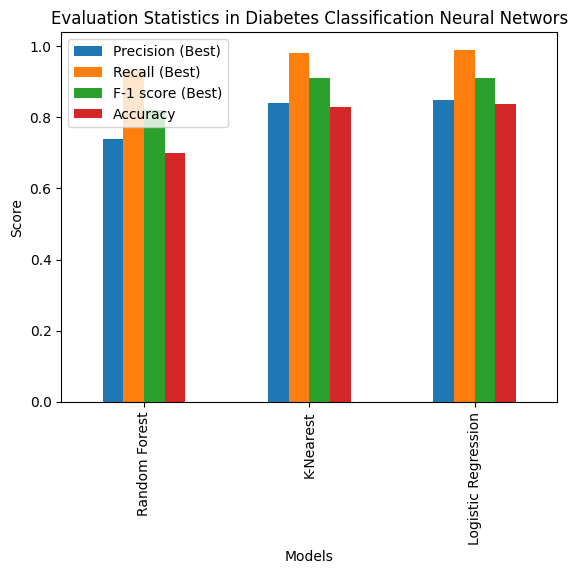

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

stats_df = pd.DataFrame({"Models": ["Random Forest", "K-Nearest", "Logistic Regression"],
              "Precision (Best)": [0.74, 0.84, 0.85],
              "Recall (Best)": [0.93, 0.98, 0.99],
              "F-1 score (Best)": [0.82, 0.91, 0.91],
              "Accuracy": [0.7, 0.830, 0.837]})

stats_df.plot(x = "Models", kind="bar")
plt.ylabel("Score")
plt.title("Evaluation Statistics in Diabetes Classification Neural Networs")

# Question 8 — (5 points)

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


This analysis would help physicians and other health care providers better understand the relationship between diabetes and other lifestyle and health factors, which they might then share with their patients. This could assist patients be more ready for what to expect and help them learn the best way to deal with a patient. The lack of correlation our data indicates between diet and diabetes, despite the fact that there is one, raises concerns about bias based on our previous work. People may feel compelled to claim to lead healthier lives than they actually do, and this may be the result of the methods used to collect the data, which could lead to inaccurate data. Analyzing data from certain groups—such as age and sex—in the context of the entire rather than their subset raises additional concerns. Everyone would benefit from taking our model's predictions (which utilize the full sample as references) cautiously if the model were to provide a more accurate forecast based just on the relevant subgroup rather than the full sample.

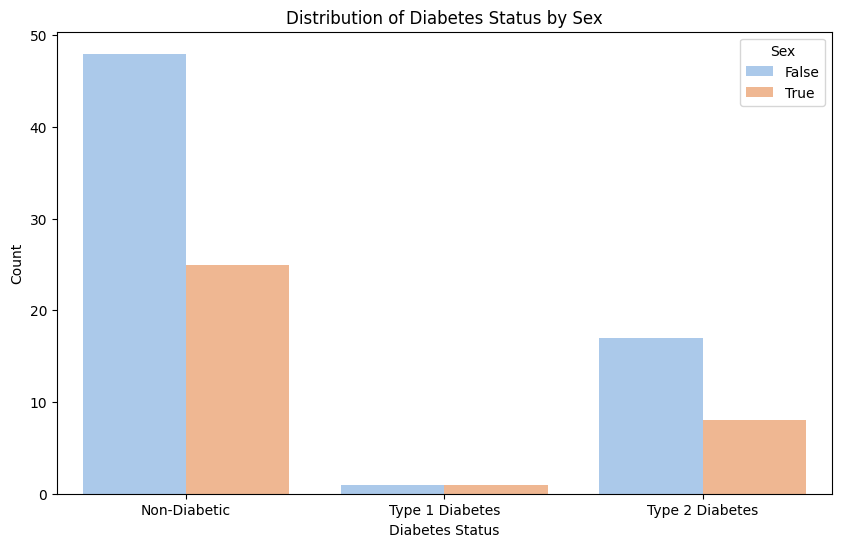

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Diabetes_012", hue="Sex", data=df, palette="pastel")
plt.title("Distribution of Diabetes Status by Sex")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ["Non-Diabetic", "Type 1 Diabetes", "Type 2 Diabetes"])
plt.legend(title="Sex", loc="upper right")
plt.show()